In [1]:
duration = 5 # in seconds

In [2]:
import scipy.io.wavfile

In [3]:
fs, recording = scipy.io.wavfile.read("../sound-examples/hello3.wav")

In [4]:
import sounddevice as sd

In [5]:
sd.play(recording)

In [6]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

In [7]:
recording.shape

(220500,)

In [8]:
signal = recording
f = np.fft.rfft(signal)
freq = np.fft.rfftfreq(len(signal), 1.0/fs)

<IPython.core.display.Javascript object>


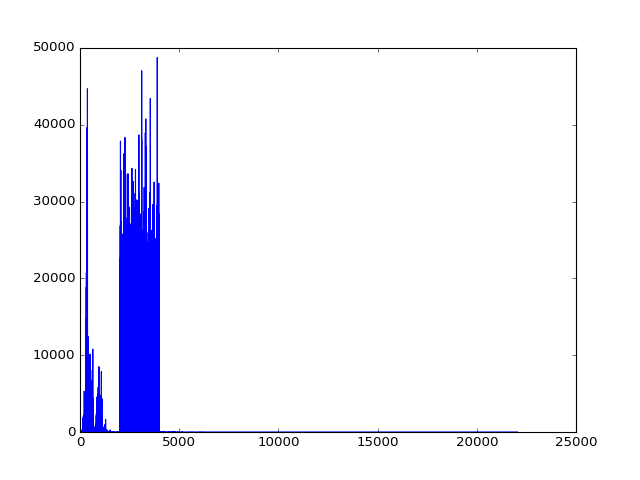

In [9]:
plt.plot(freq, np.abs(f)**2)

# Exploring the image with the nbagg backend, you should be able to see that the noise is in a band of frequencies with a lower bound around 1500 Hz.

In [10]:
nyquist = fs/2
cutoff = 1500./nyquist

In [11]:
import scipy.signal
b, a = scipy.signal.butter(15, cutoff, analog=False)

# The above creates a 15 'tap' Butterworth filter, a type of IIR filter.  The default parameters used here create a low pass filter with cutoff frequency specified by the value in the 'cutoff' variable set to 1500 in the previous cell.

<IPython.core.display.Javascript object>


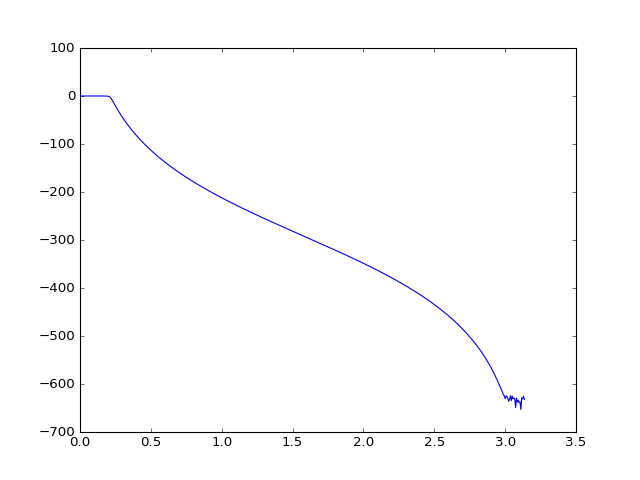

In [12]:
# attenuation by frequency
w, h = scipy.signal.freqz(b, a)
plt.plot(w, 20*np.log10(np.abs(h)))

In [13]:
# forward/backward filtering using filtfilt
signal_fixed = scipy.signal.filtfilt(b, a, signal)

<IPython.core.display.Javascript object>


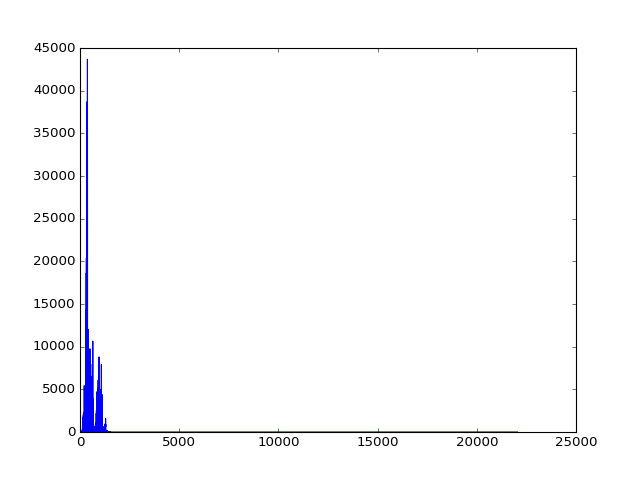

In [14]:
f3 = np.fft.rfft(signal_fixed)
plt.plot(freq, np.abs(f3)**2)

In [15]:
sd.play(signal_fixed)

# Now, to look at both images with specgram

<IPython.core.display.Javascript object>


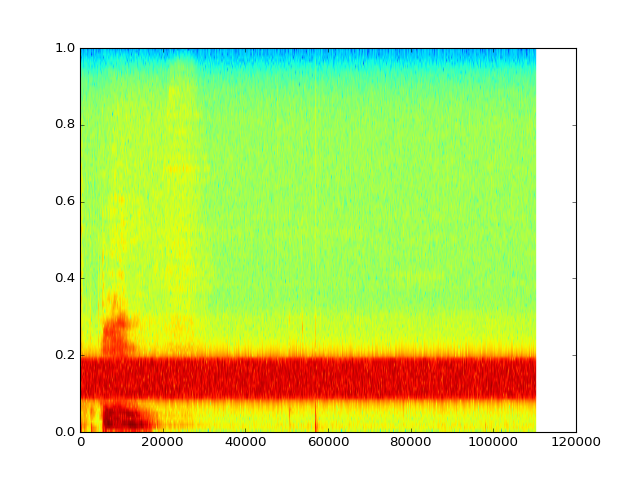

In [16]:
_ = plt.specgram(signal)

<IPython.core.display.Javascript object>


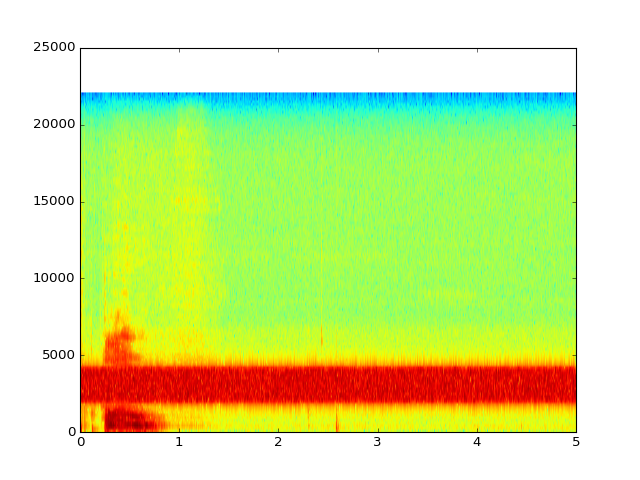

In [17]:
_ = plt.specgram(signal, Fs=fs)
# setting Fs labels the time and frequency axes properly

<IPython.core.display.Javascript object>


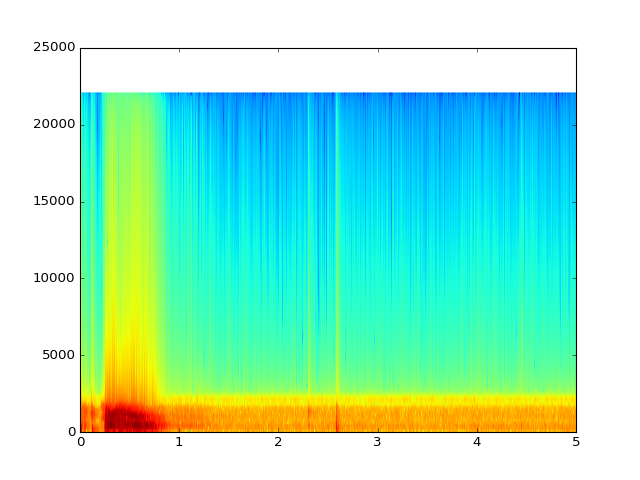

In [18]:
_  = plt.specgram(signal_fixed, Fs=fs)